In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
Nclass = 500 # number of samples per class

We are creating 500 samples per class. For that make 3 gaussian clouds of data.

Two features, 500 datapoints for this cloud. the cloud is centered at (0,-2)

In [19]:
X1 = np.random.randn(500, 2) + np.array([0, -2])

Similarly the other two

In [20]:
X2 = np.random.randn(500, 2) + np.array([2, 2])
X3 = np.random.randn(500, 2) + np.array([-2, 2])

Creating the labels

In [21]:
Y = np.array([0] * Nclass + [1] * Nclass + [2] * Nclass)
Y

array([0, 0, 0, ..., 2, 2, 2])

Merginig the data

In [24]:
X = np.vstack([X1, X2, X3])

Visualizing the data

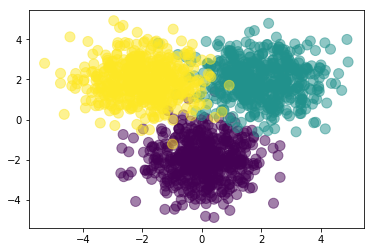

In [25]:
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.show()

In [26]:
D = 2 # Dimensions (no of features)
M = 3 # Hidden Layer Size
K = 3 # No of class labels

Initialize the weights

In [27]:
W1 = np.random.randn(D, M) # weight matrix
b1 = np.random.randn(M) # bias vector
W2 = np.random.randn(M, K) # Weight matrix from mid layer to outlayer
b2 = np.random.randn(K) # bias of outlayer

Defining the feedforward operation

X is a NxD matrix <br>
X.W1 + b1 gives the dot product ie the values of each node in hidden layer<br>
Z is the activation using exp function<br>
Y is the softmax

In [28]:
def forward(X, W1, b1, W2, b2):
    Z = 1 / (1 + np.exp(-(X.dot(W1) + b1)))
    A = Z.dot(W2) + b2
    expa = np.exp(A)
    Y = expa / expa.sum(axis=1, keepdims=True)
    return Y

Define a function to calculate the accuracy

In [33]:
def classification_rate(Y, P): # Y is the actual and P is predicted vectors
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct / n_total)

Calculating P(Y|X)

In [30]:
P_Y_given_X = forward(X, W1, b1, W2, b2)
P = np.argmax(P_Y_given_X, axis=1) # This returns the index of the max value in the row

In [31]:
assert(len(P) == len(Y))

In [34]:
print("Classification rate = ", classification_rate(Y, P))

Classification rate =  0.3333333333333333
